In [1]:
import MisrToolkit as Mtk
from MisrToolkit import *
import os
import pandas as pd
import numpy as np
from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL


In [2]:
def find_unique_pob(atmmodel_file_fp, list_of_columns):
    
    print('input file found: %s' %(os.path.isfile(atmmodel_file_fp)))
    in_csv_df = pd.read_csv(atmmodel_file_fp)
    print(in_csv_df.columns)
    pob_unique = in_csv_df.drop_duplicates(subset=list_of_columns, keep='first', ignore_index=False)
    pob_unique.info()
    
    return pob_unique

In [3]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
    img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0

## set up hdf file directory

In [4]:
# hdf_dir = "/Volumes/SEAGATE/april_2016/hdf_from_PH/move_to_Mac"
# hdf_dir = "/Volumes/SEAGATE/april_2016/hdf_from_PH/move_to_Mac"
# hdf_dir = "/Volumes/Ehsan-7757225325/2016/july_2016/ellipsoid_files/elliposid_files_used_for_mapping"

hdf_dir = "/Volumes/SEAGATE/roughness_test_p104_o86919_b23"


In [5]:
path_num = '104'
orbit_num = 86919
start_block = 23
end_block = 23

cam = "AN"

corners_for_block = 23


In [6]:
# hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P233_O086796_CF_F03_0024.hdf"

hdf_file = "MISR_AM1_GRP_ELLIPSOID_GM_P"+path_num+"_O0"+str(orbit_num)+"_"+cam+"_F03_0024.hdf"


In [7]:
hdf_file_fp = os.path.join(hdf_dir, hdf_file)
print(os.path.isfile(hdf_file_fp))
print(hdf_file_fp)

True
/Volumes/SEAGATE/roughness_test_p104_o86919_b23/MISR_AM1_GRP_ELLIPSOID_GM_P104_O086919_AN_F03_0024.hdf


In [8]:
input_hdf = MtkFile(hdf_file_fp)

In [9]:
input_hdf.block

(5, 46)

In [10]:
input_hdf.grid

<function MtkFile.grid>

In [11]:
input_hdf.grid_list

['BlueBand', 'GreenBand', 'RedBand', 'NIRBand', 'BRF Conversion Factors']

In [12]:
input_hdf.grid("RedBand").field_list

['Red Radiance/RDQI',
 'Red Radiance',
 'Red RDQI',
 'Red DN',
 'Red Equivalent Reflectance',
 'Red Brf']

In [13]:
input_hdf.grid("RedBand").native_field_list

['Red Radiance/RDQI']

In [14]:
r = MtkRegion(int(path_num), start_block, end_block)
type(r)

MisrToolkit.MtkRegion

In [15]:
# find block corners

corners = path_block_range_to_block_corners(int(path_num), start_block, end_block)

In [16]:
# type(corners.block[1].ctr)
# dir(corners.block[9])

In [17]:
print(corners.block[corners_for_block].ulc)
print(corners.block[corners_for_block].urc)
print(corners.block[corners_for_block].llc)
print(corners.block[corners_for_block].lrc)

(82.765744,-165.158138)
(78.347825,-149.919798)
(81.944190,-172.325220)
(77.818410,-155.444788)


In [18]:
# print(bls_to_latlon(int(path_num), 275, 9, 0, 0))
# print(bls_to_latlon(int(path_num), 275, 9, 0, 2047))
# print(bls_to_latlon(int(path_num), 275, 9, 511, 0)) # llc
# print(bls_to_latlon(int(path_num), 275, 9, 511, 2047))

In [19]:
input_hdf.grid("RedBand").field("Red Radiance/RDQI").fill_value

65515

## note: 65515 is fill value for padding part of the image = white part?

In [20]:
redband_img = input_hdf.grid("RedBand").field("Red Radiance/RDQI").read(r).data()

In [21]:
print("redBand min: %d" %redband_img.min())
print("redBand med: %d" %np.median(redband_img))
print("redBand max: %d" %redband_img.max())

redBand min: 1532
redBand med: 12636
redBand max: 65515


In [22]:
redband_img.shape

(512, 2048)

In [23]:
print(redband_img.dtype)
print(type(redband_img))

uint16
<class 'numpy.ndarray'>


In [24]:
redband_img_flat = redband_img.flatten()
redband_img_flat.shape

(1048576,)

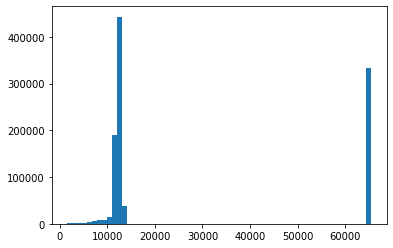

In [25]:
# np.histogram(redband_img)
ret_hist = plt.hist(redband_img_flat, bins='auto')
plt.show()

In [26]:
# def rescale(in_arr):
#     domain = in_arr.max()-in_arr.min()
#     for i in 

<Figure size 432x288 with 0 Axes>

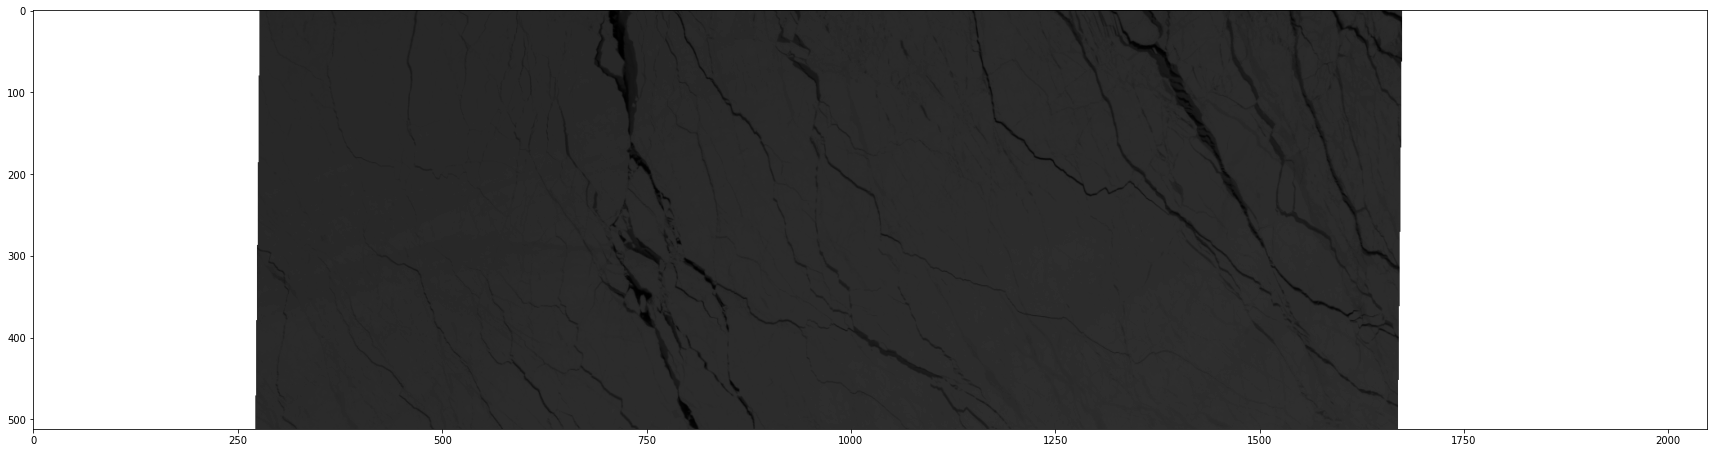

0

In [27]:
plot_here_and_write(redband_img, hdf_dir)
